# Visualisation des prévisions (sur les Départs)

In [1]:
import pandas as pd
import numpy as np

from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
database_7j = pd.read_csv("Previsions_7j.csv",low_memory=False,decimal=',')
database_7j = database_7j.astype({'Date': 'datetime64[ns]','PAX':'float','PAX_NP':'float','IC95_low_NP':'float','IC95_up_NP':'float',
                          'PAX_ARIMA':'float','IC95_low_ARIMA':'float','IC95_up_ARIMA':'float',
                          'PAX_SARIMA':'float','IC95_low_SARIMA':'float','IC95_up_SARIMA':'float',
                          'PAX_Lasso':'float', 'PAX_FQM':'float'})

In [40]:
database_91j = pd.read_csv("Previsions_91j.csv",low_memory=False,decimal=',')
database_91j = database_91j.astype({'Date': 'datetime64[ns]','PAX':'float','PAX_NP':'float','IC95_low_NP':'float','IC95_up_NP':'float',
                          'PAX_ARIMA':'float','IC95_low_ARIMA':'float','IC95_up_ARIMA':'float',
                          'PAX_SARIMA':'float','IC95_low_SARIMA':'float','IC95_up_SARIMA':'float',
                          'PAX_Lasso':'float', 'PAX_FQM':'float'})

In [96]:
database_365j = pd.read_csv("Previsions_365j.csv",low_memory=False,decimal=',')
database_365j = database_365j.astype({'Date': 'datetime64[ns]','PAX':'float','PAX_NP':'float','IC95_low_NP':'float','IC95_up_NP':'float',
                          'PAX_ARIMA':'float','IC95_low_ARIMA':'float','IC95_up_ARIMA':'float',
                          'PAX_SARIMA':'float','IC95_low_SARIMA':'float','IC95_up_SARIMA':'float',
                          'PAX_Lasso':'float', 'PAX_FQM':'float'})

In [97]:
faisceaux = ["National","Schengen","Dom Tom","Autre UE","International"]

dateDebPrev=pd.to_datetime("2016-01-01")

database_7j_depart = database_7j[database_7j['ArrDep'].isin(['Départ'])]
database_91j_depart = database_91j[database_91j['ArrDep'].isin(['Départ'])]
database_365j_depart = database_365j[database_365j['ArrDep'].isin(['Départ'])]

## Visualisation des prévisions individuelles sur 7 jours, avec leurs intervalles de confiance

In [35]:
prev_7j_depart = database_7j_depart[database_depart['Date']>=dateDebPrev]

#Sélection d'un historique d'un mois :
histo_7j_depart = database_7j_depart[(database_7j_depart['Date']<dateDebPrev) & (database_7j_depart['Date']>= dateDebPrev - timedelta(days = 31))]

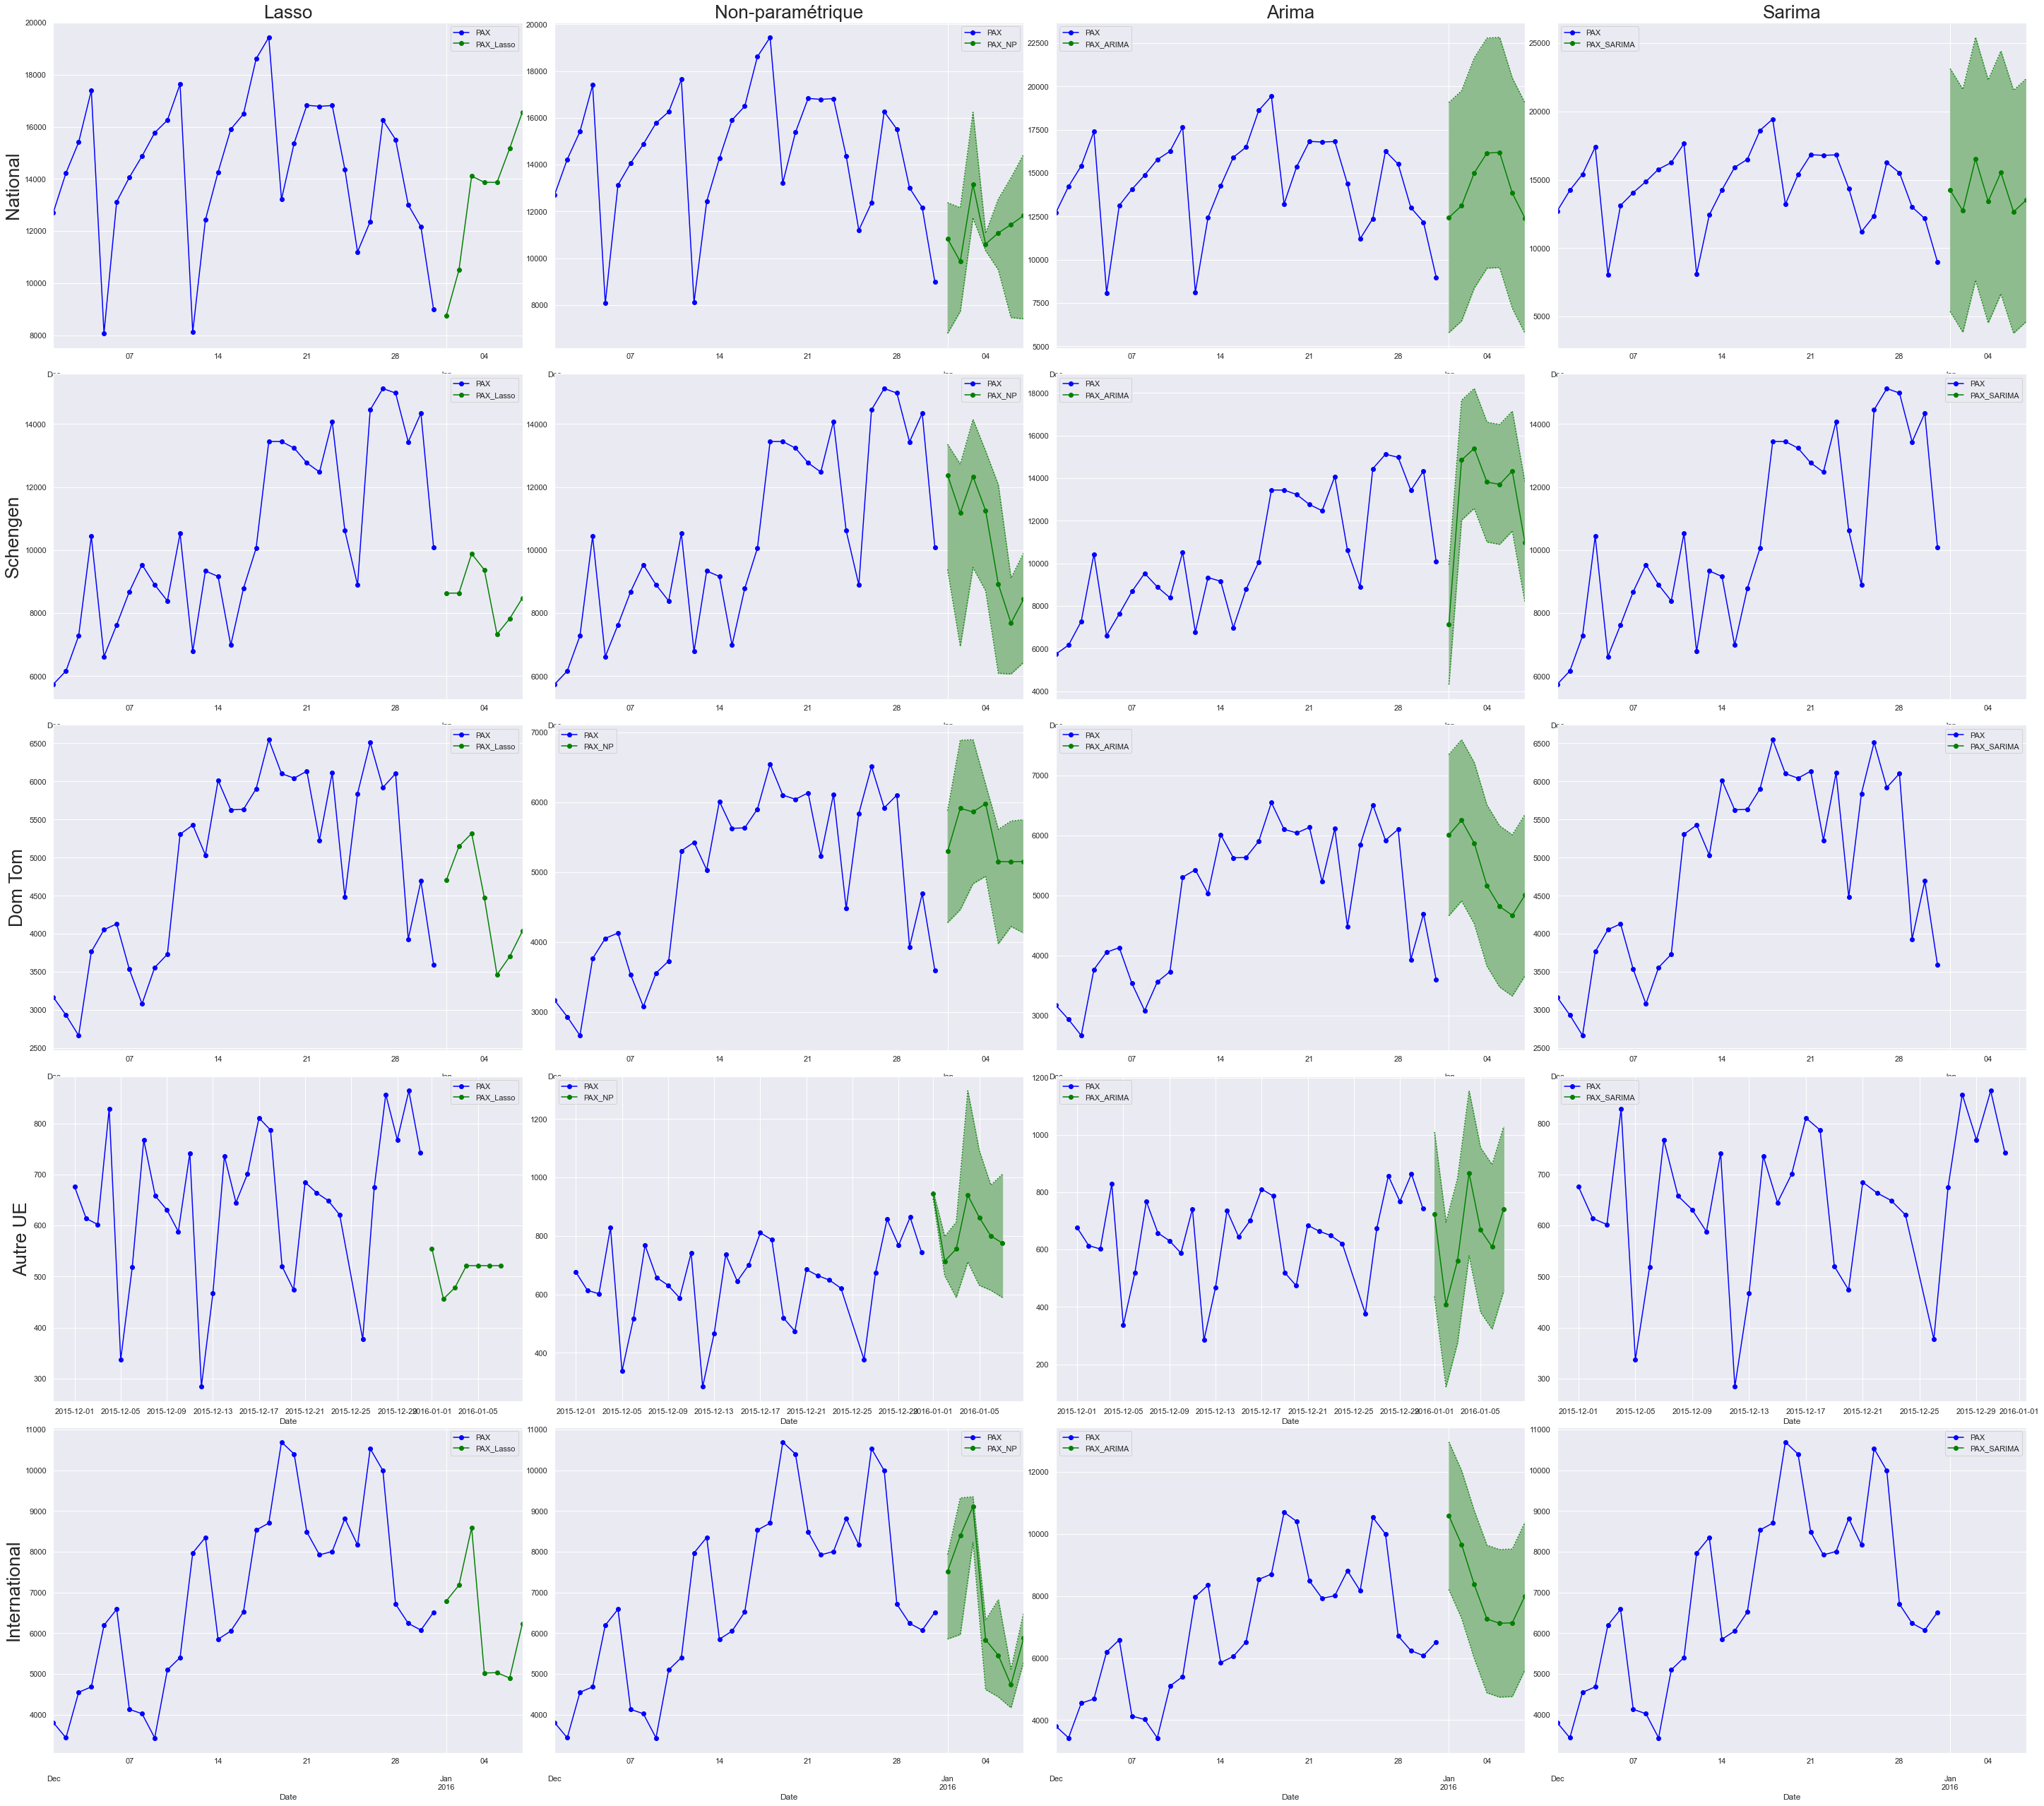

In [36]:
sns.set(style='darkgrid')

cols = ["Lasso", "Non-paramétrique","Arima","Sarima"]

fig, ax = plt.subplots(5,4, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :
    
    axi = ax[i,:]
    histo = histo_7j_depart[histo_7j_depart['Faisceau'].isin([faisceaux[i]])]
    prev = prev_7j_depart[prev_7j_depart['Faisceau'].isin([faisceaux[i]])]
    
    
    # Modele Lasso : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='green',style='o-')

    
    # Modele NP :
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,1)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_NP']), y2=list(prev['IC95_low_NP']), color='darkseagreen', label='IC à 95%')

    prev[['Date','IC95_up_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    prev[['Date','IC95_low_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Arima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,2)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_ARIMA']), y2=list(prev['IC95_low_ARIMA']), color='darkseagreen', label='IC à 95%')

    prev[['Date','IC95_up_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    prev[['Date','IC95_low_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Sarima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,3)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_SARIMA']), y2=list(prev['IC95_low_SARIMA']), color='darkseagreen', label='IC à 95%')

    prev[['Date','IC95_up_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    prev[['Date','IC95_low_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    
    
plt.show()

## Comparaison des prévisions sur 7 jours


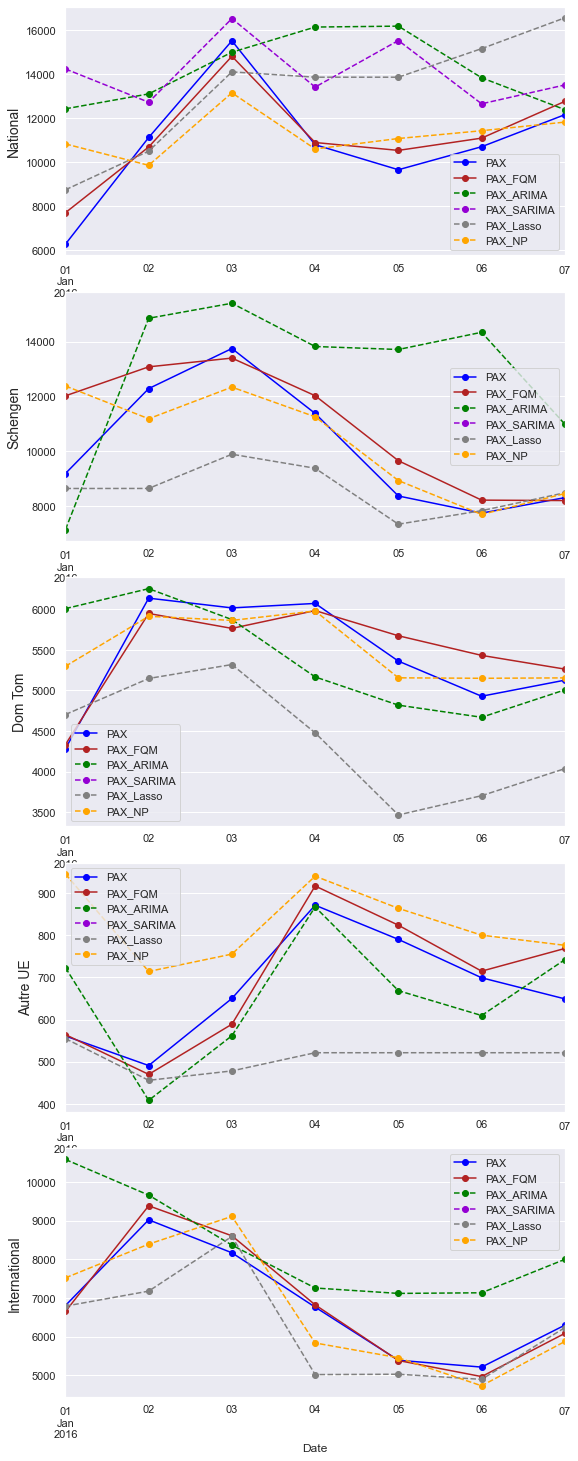

In [20]:
sns.set(style='darkgrid')


fig, ax = plt.subplots(5,1, figsize=(8,20))

for axi, row in zip(ax[:], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=14)

fig.tight_layout()

for i in range(5) :

    prev = prev_7j_depart[prev_depart['Faisceau'].isin([faisceaux[i]])]
    

    prev[['Date','PAX']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='blue',style='o-')
    
    prev[['Date','PAX_FQM']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='firebrick',style='o-')
    
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='green',style='o--')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='darkviolet',style='o--')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='grey',style='o--')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='orange',style='o--')


plt.show()

## Visualisation des prévisions individuelles sur 3 mois, avec leurs intervalles de confiance

In [44]:
prev_91j_depart = database_91j_depart[database_91j_depart['Date']>=dateDebPrev]

#Sélection d'un historique de 3 mois :
histo_91j_depart = database_91j_depart[(database_91j_depart['Date']<dateDebPrev) & (database_91j_depart['Date']>= dateDebPrev - timedelta(days = 92))]

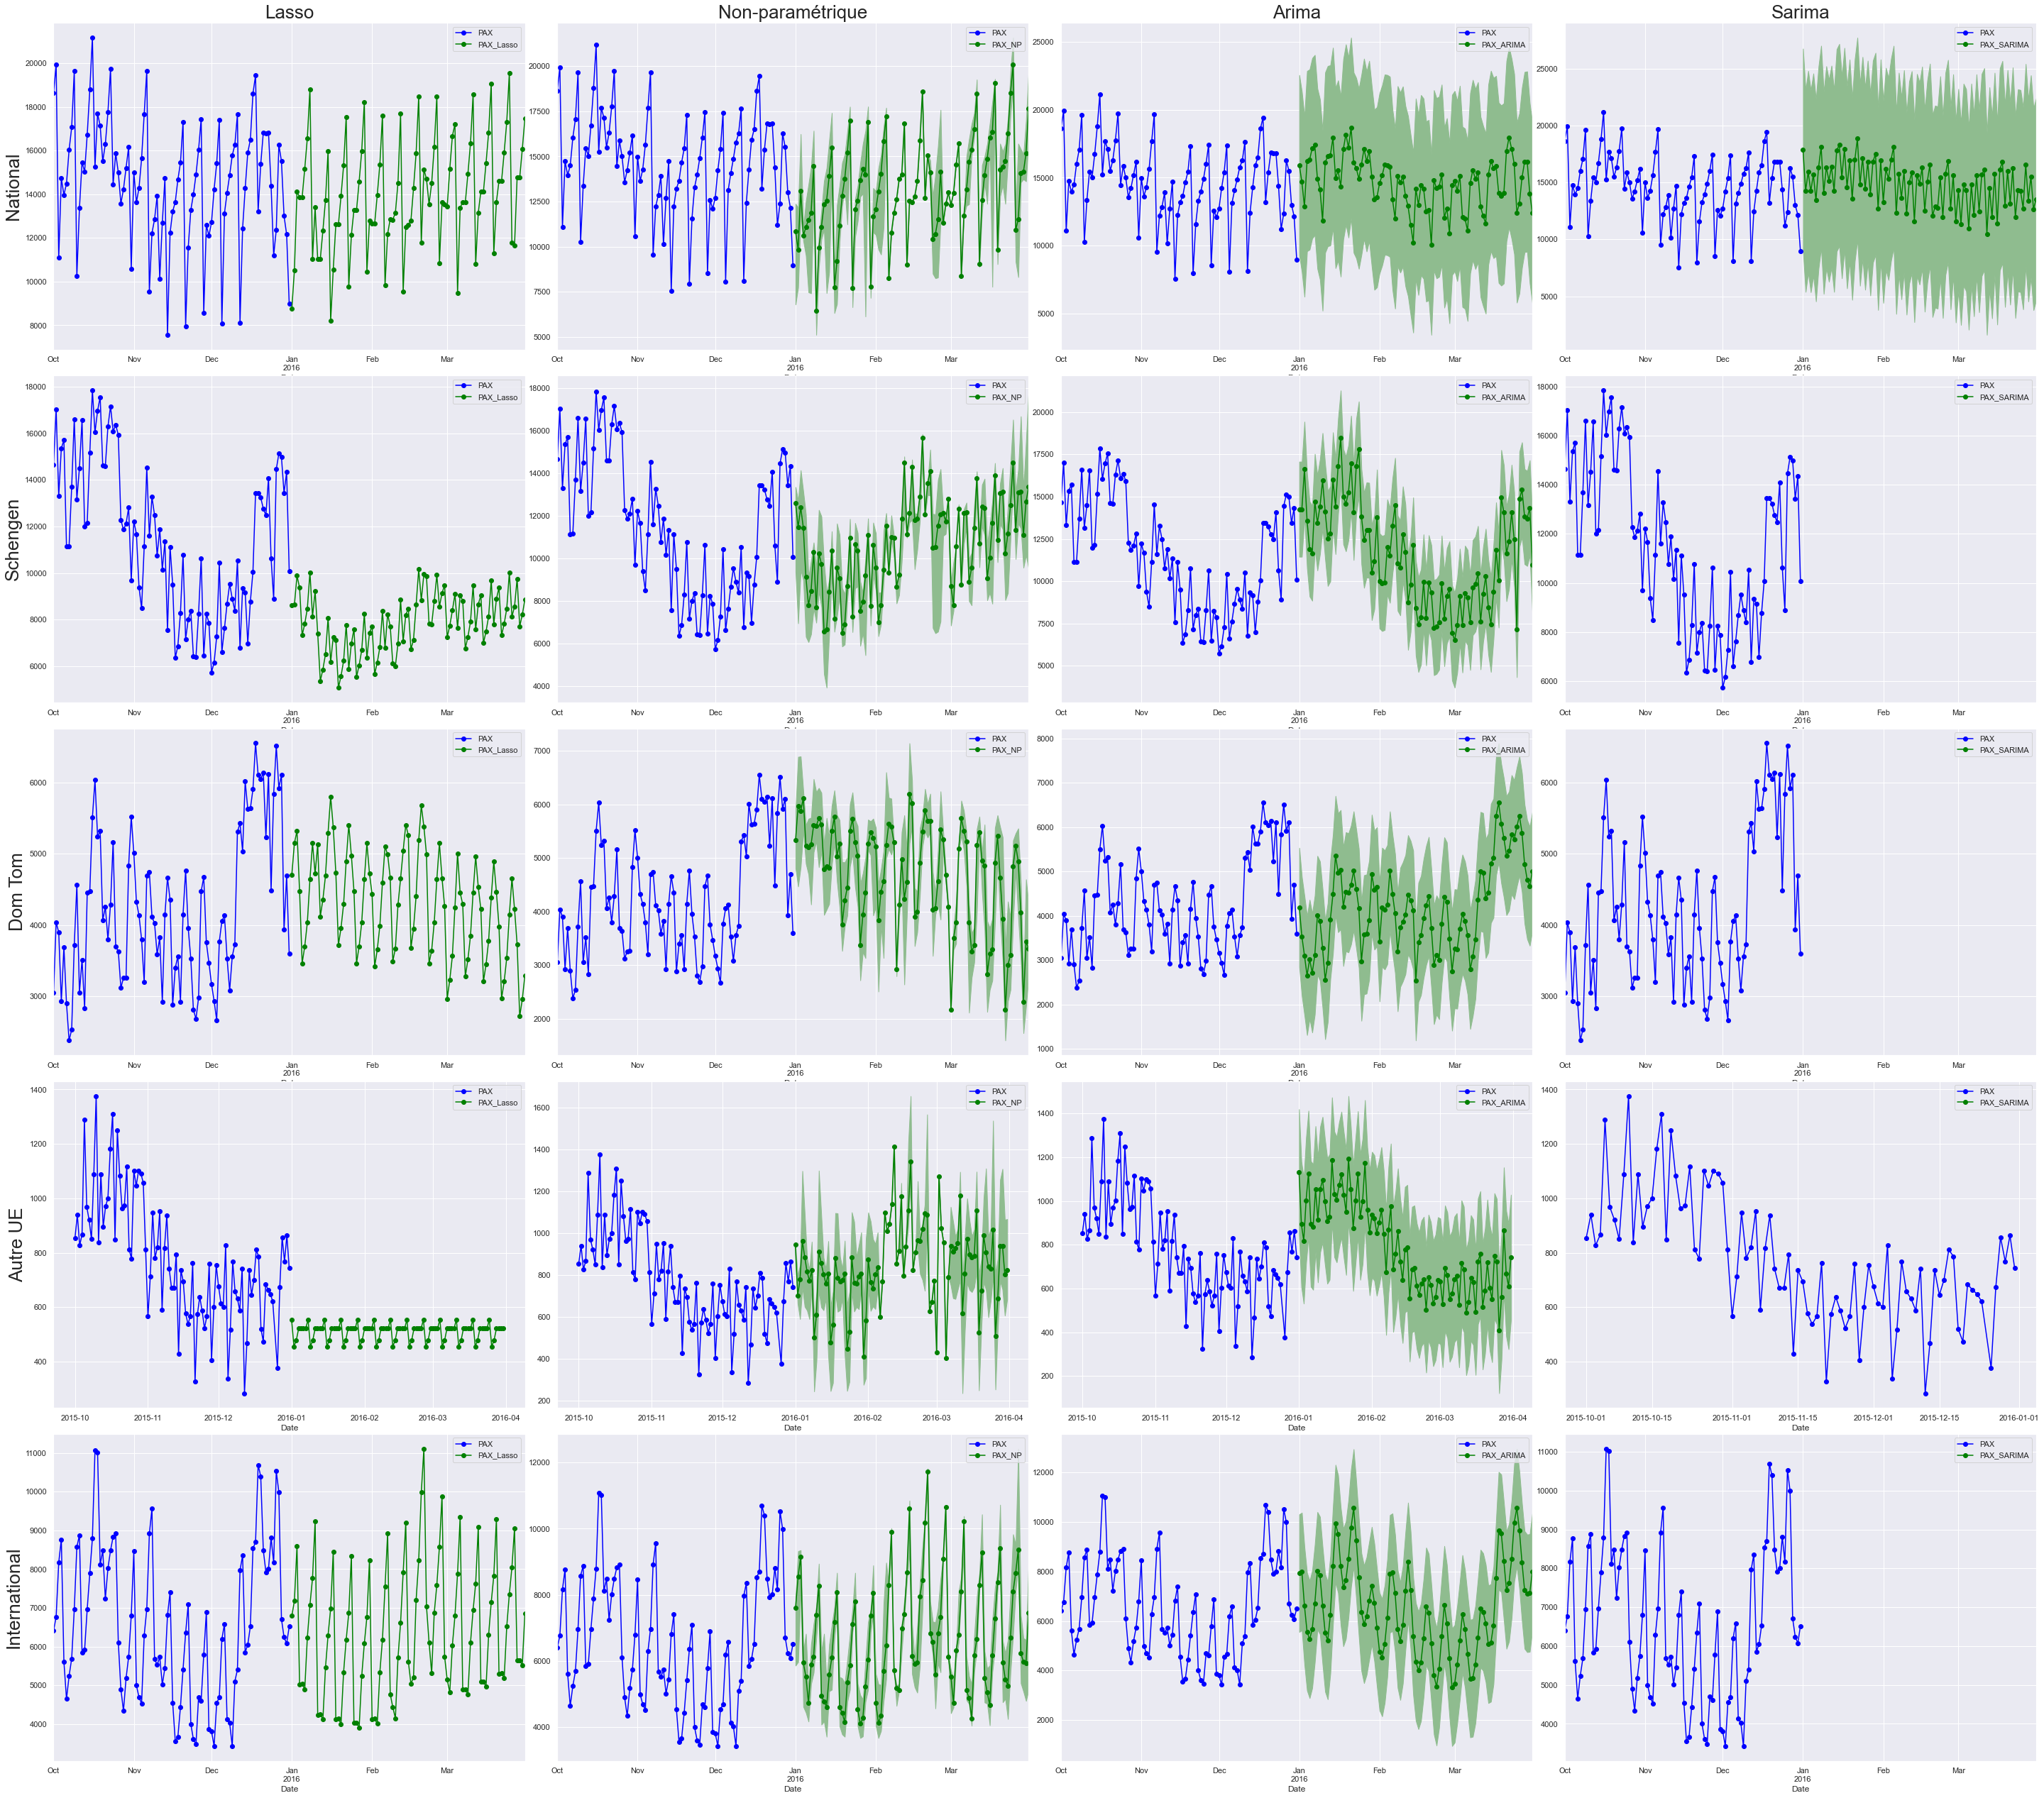

In [45]:
sns.set(style='darkgrid')

cols = ["Lasso", "Non-paramétrique","Arima","Sarima"]

fig, ax = plt.subplots(5,4, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :
    
    axi = ax[i,:]
    histo = histo_91j_depart[histo_91j_depart['Faisceau'].isin([faisceaux[i]])]
    prev = prev_91j_depart[prev_91j_depart['Faisceau'].isin([faisceaux[i]])]
    
    
    # Modele Lasso : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='green',style='o-')

    
    # Modele NP :
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,1)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_NP']), y2=list(prev['IC95_low_NP']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Arima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,2)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_ARIMA']), y2=list(prev['IC95_low_ARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Sarima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,3)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_SARIMA']), y2=list(prev['IC95_low_SARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    
    
plt.show()

## Visualisation des prédictions sur 1 an, agrégées par semaine

In [98]:
prev_365j_depart = database_365j_depart[database_365j_depart['Date']>=dateDebPrev]

#Sélection d'un historique de 3 ans :
histo_365j_depart = database_365j_depart[(database_365j_depart['Date']<dateDebPrev) & (database_365j_depart['Date']>= dateDebPrev - timedelta(days = 3*365))]

In [99]:
prev_365j_depart['Week'] = prev_365j_depart["Date"].dt.strftime('%Y%W')
histo_365j_depart['Week'] = histo_365j_depart["Date"].dt.strftime('%Y%W')

histo_365j_depart_agg = histo_365j_depart[['Week','PAX','Date','Faisceau']]
histo_365j_depart_agg = histo_365j_depart_agg.groupby(['Week','Faisceau']).agg({'PAX':'sum','Date':'min'}).reset_index()

prev_365j_depart_agg = prev_365j_depart[['Week','PAX_NP','PAX_ARIMA','PAX_SARIMA','PAX_Lasso','Date','Faisceau']]
prev_365j_depart_agg = prev_365j_depart_agg.groupby(['Week','Faisceau']).agg({'PAX_NP':'sum','PAX_ARIMA':'sum','PAX_SARIMA':'sum','PAX_Lasso':'sum','Date':'min'}).reset_index()

<ipython-input-99-cddfd70ce78c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev_365j_depart['Week'] = prev_365j_depart["Date"].dt.strftime('%Y%W')
<ipython-input-99-cddfd70ce78c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  histo_365j_depart['Week'] = histo_365j_depart["Date"].dt.strftime('%Y%W')


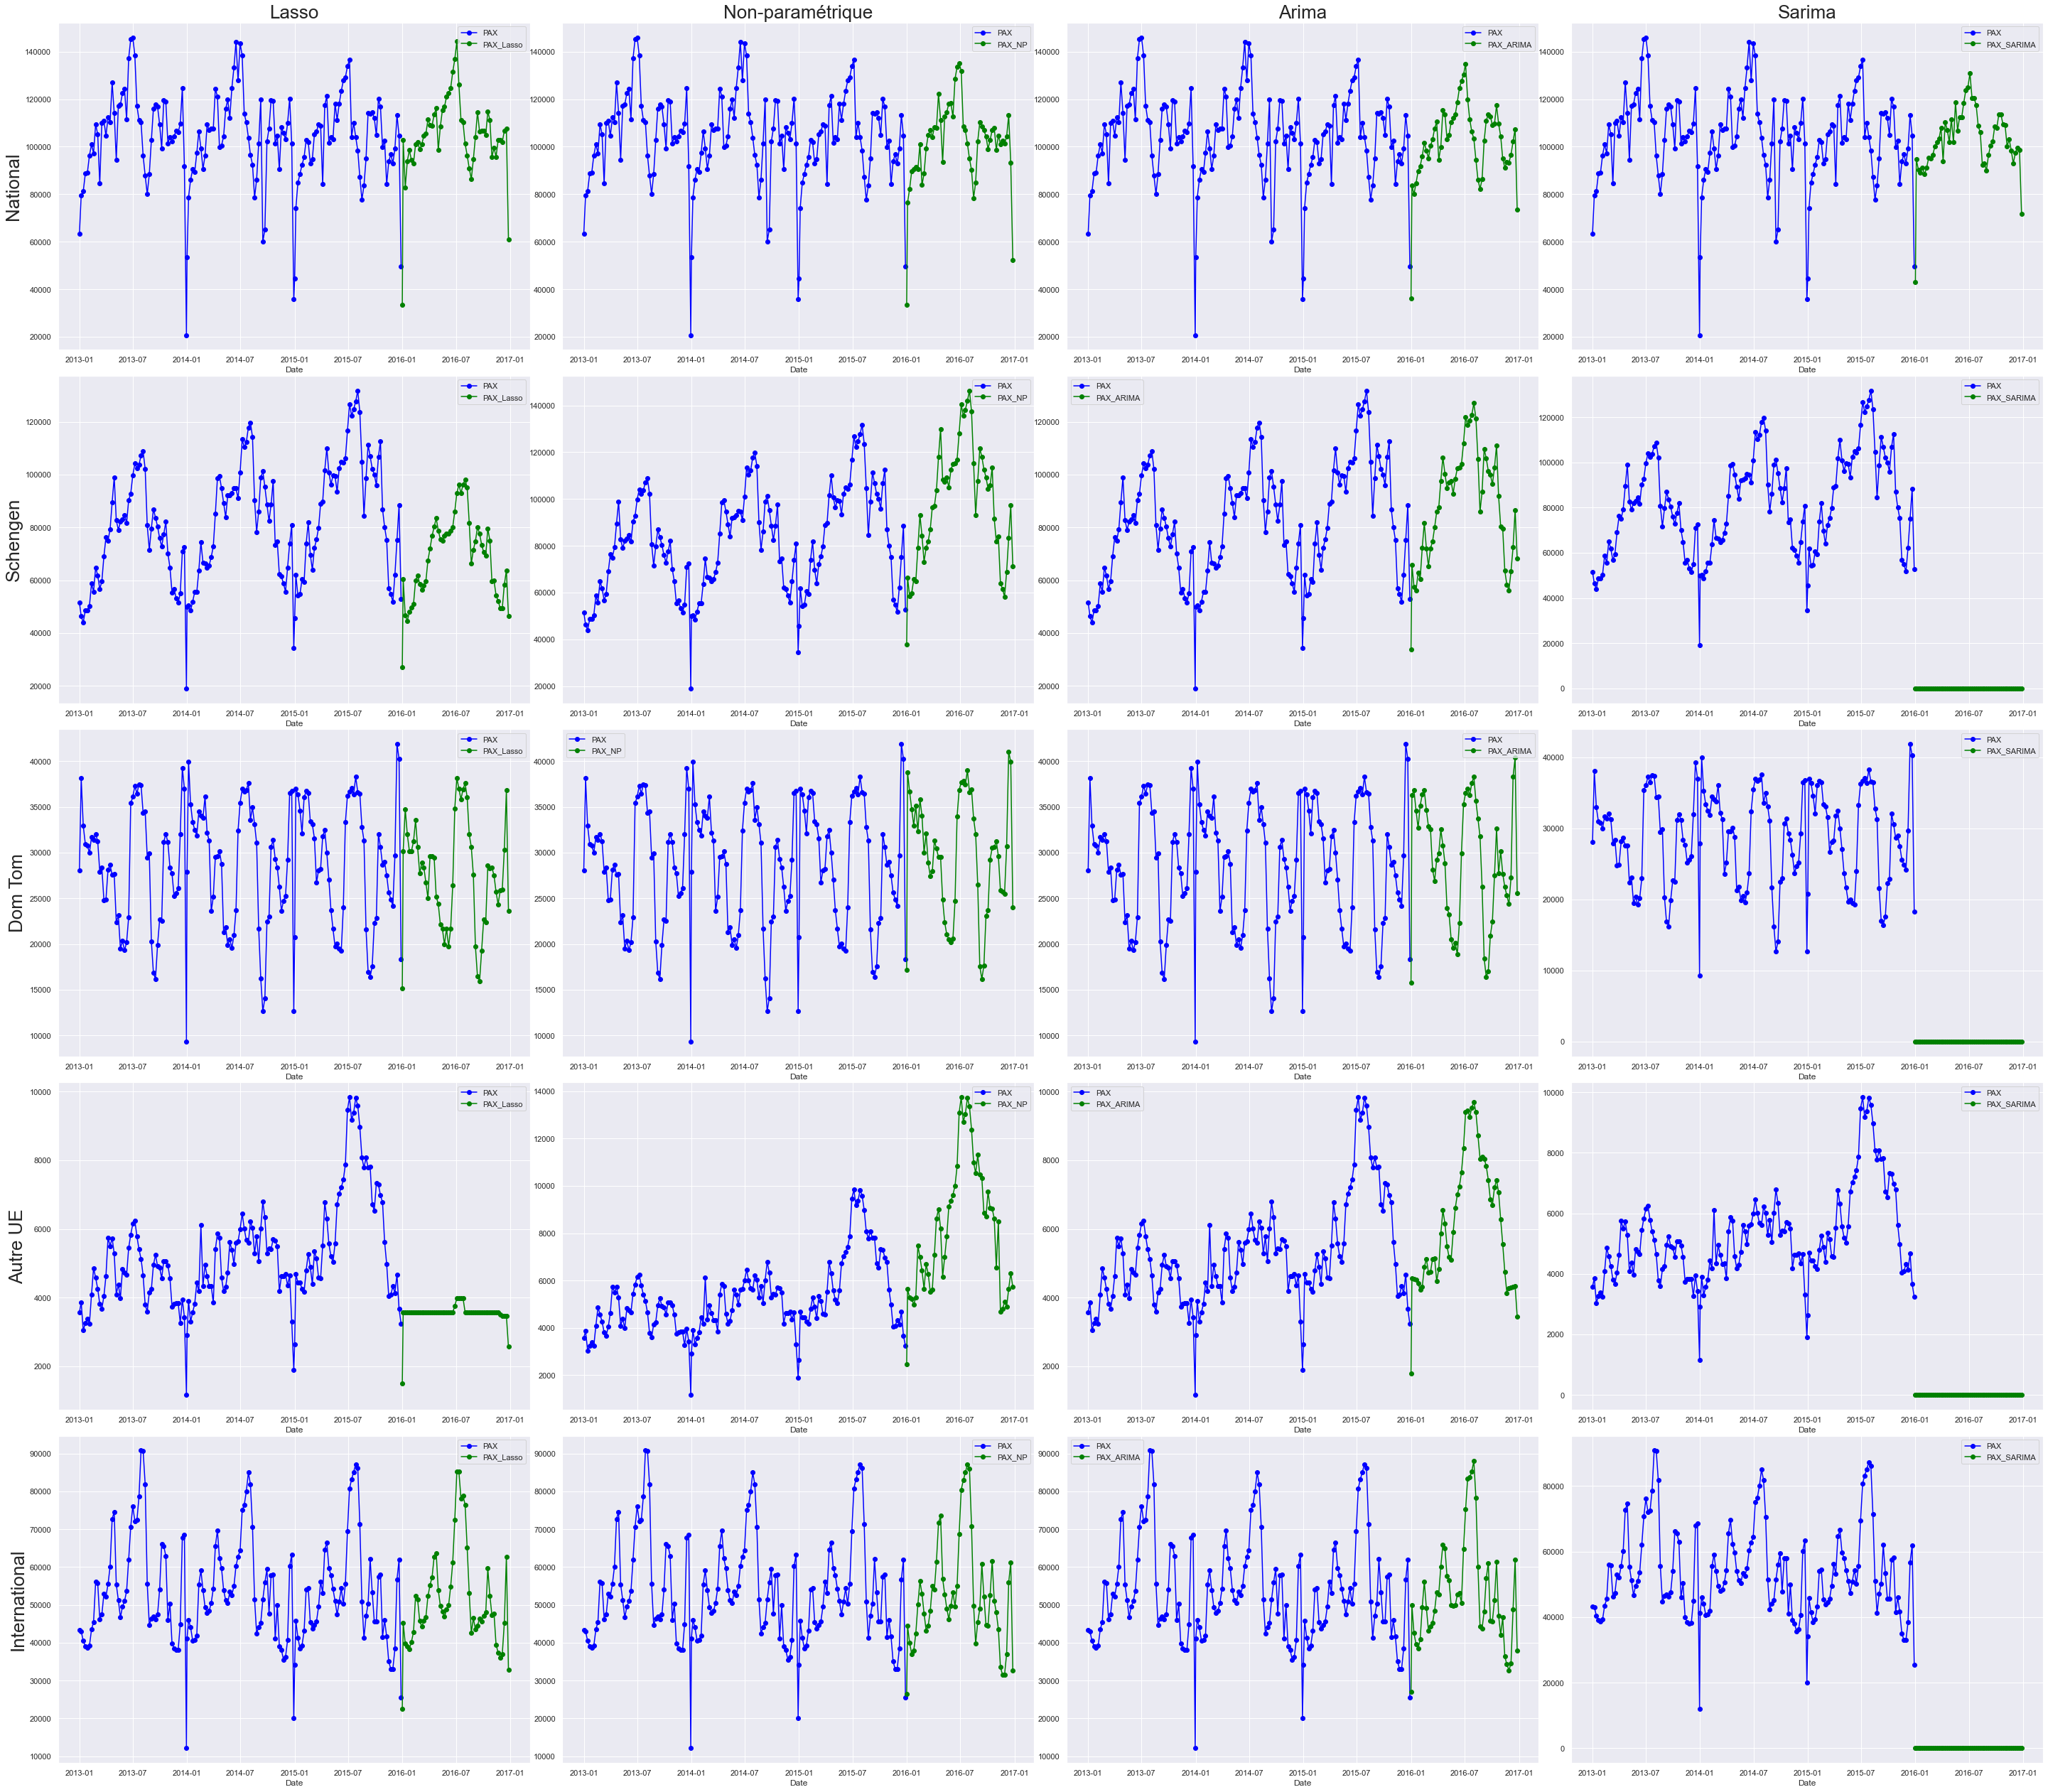

In [100]:
sns.set(style='darkgrid')

cols = ["Lasso", "Non-paramétrique","Arima","Sarima"]

fig, ax = plt.subplots(5,4, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :
    
    axi = ax[i,:]
    histo = histo_365j_depart_agg[histo_365j_depart_agg['Faisceau'].isin([faisceaux[i]])]
    prev = prev_365j_depart_agg[prev_365j_depart_agg['Faisceau'].isin([faisceaux[i]])]
    
    
    # Modele Lasso : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='green',style='o-')

    
    # Modele NP :
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='green',style='o-')

    #ax[(i,1)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_NP']), y2=list(prev['IC95_low_NP']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Arima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='green',style='o-')

    #ax[(i,2)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_ARIMA']), y2=list(prev['IC95_low_ARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Sarima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='green',style='o-')

    #ax[(i,3)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_SARIMA']), y2=list(prev['IC95_low_SARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    
    
plt.show()

## Calcul d'indicateurs de performance (RMSE et MAPE)

In [49]:
# Calcul des performances (RMSE et MAPE) sur 7 jours
from math import sqrt 

modeles=['FQM','Lasso','NP','ARIMA','SARIMA']
performances_7j = pd.DataFrame(columns=['Faisceau','Modèle','RMSE_7j','MAPE_7j'])

for i in range(5) :
    
    prev = prev_7j_depart[prev_7j_depart['Faisceau'].isin([faisceaux[i]])]
    
    for k in modeles :
        prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
        mape_k = prev['ape_'+k].mean()
        
        prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2
        rmse_k = sqrt(prev['se_'+k].mean())
        
        performances_7j = performances_7j.append({'Faisceau': faisceaux[i], 'Modèle' : k, 'RMSE_7j' : rmse_k, 'MAPE_7j' : mape_k}, ignore_index=True)
        

<ipython-input-49-223472f49b99>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
<ipython-input-49-223472f49b99>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2


In [50]:
# Calcul des performances (RMSE et MAPE) sur 91 jours
from math import sqrt 

modeles=['FQM','Lasso','NP','ARIMA','SARIMA']
performances_91j = pd.DataFrame(columns=['Faisceau','Modèle','RMSE_91j','MAPE_91j'])

for i in range(5) :
    
    prev = prev_91j_depart[prev_91j_depart['Faisceau'].isin([faisceaux[i]])]
    
    for k in modeles :
        prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
        mape_k = prev['ape_'+k].mean()
        
        prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2
        rmse_k = sqrt(prev['se_'+k].mean())
        
        performances_91j = performances_91j.append({'Faisceau': faisceaux[i], 'Modèle' : k, 'RMSE_91j' : rmse_k, 'MAPE_91j' : mape_k}, ignore_index=True)
        

<ipython-input-50-5fc3fb863cbd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
<ipython-input-50-5fc3fb863cbd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2


In [101]:
# Calcul des performances (RMSE et MAPE) sur 365 jours
from math import sqrt 

modeles=['FQM','Lasso','NP','ARIMA','SARIMA']
performances_365j = pd.DataFrame(columns=['Faisceau','Modèle','RMSE_365j','MAPE_365j'])

for i in range(5) :
    
    prev = prev_365j_depart[prev_365j_depart['Faisceau'].isin([faisceaux[i]])]
    
    for k in modeles :
        prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
        mape_k = prev['ape_'+k].mean()
        
        prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2
        rmse_k = sqrt(prev['se_'+k].mean())
        
        performances_365j = performances_365j.append({'Faisceau': faisceaux[i], 'Modèle' : k, 'RMSE_365j' : rmse_k, 'MAPE_365j' : mape_k}, ignore_index=True)
        

<ipython-input-101-110059330a9c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
<ipython-input-101-110059330a9c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2


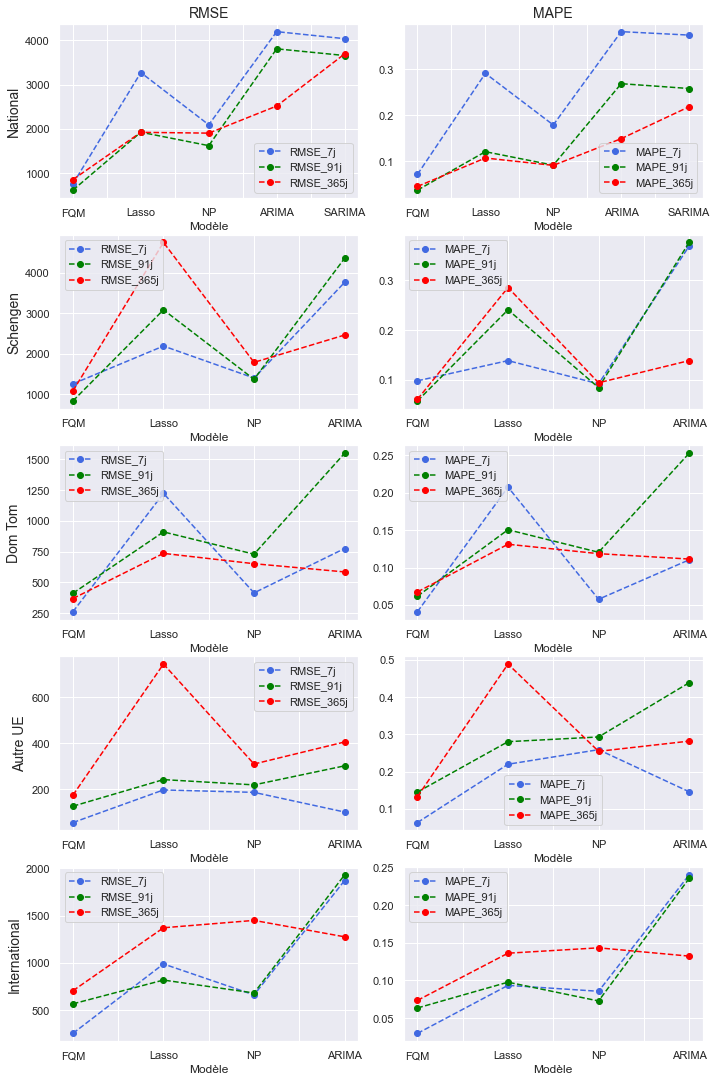

In [103]:
sns.set(style='darkgrid')

cols = ["RMSE","MAPE"]

fig, ax = plt.subplots(5,2, figsize=(10,15))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=14)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=14)

fig.tight_layout()


for i in range(5) :
    
    # Performances sur 7 jours :
    perf = performances_7j[performances_7j['Faisceau'].isin([faisceaux[i]])]

    perf[['Modèle','RMSE_7j']].set_index('Modèle').plot(ax = ax[(i,0)],subplots=True,color='royalblue',style='o--')
    perf[['Modèle','MAPE_7j']].set_index('Modèle').plot(ax = ax[(i,1)],subplots=True,color='royalblue',style='o--')
    
    
    # Performances sur 91 jours :
    perf = performances_91j[performances_91j['Faisceau'].isin([faisceaux[i]])]

    perf[['Modèle','RMSE_91j']].set_index('Modèle').plot(ax = ax[(i,0)],subplots=True,color='green',style='o--')
    perf[['Modèle','MAPE_91j']].set_index('Modèle').plot(ax = ax[(i,1)],subplots=True,color='green',style='o--')
    
    
    # Performances sur 365 jours :
    perf = performances_365j[performances_365j['Faisceau'].isin([faisceaux[i]])]

    perf[['Modèle','RMSE_365j']].set_index('Modèle').plot(ax = ax[(i,0)],subplots=True,color='red',style='o--')
    perf[['Modèle','MAPE_365j']].set_index('Modèle').plot(ax = ax[(i,1)],subplots=True,color='red',style='o--')


plt.show()